# Titanic Data Analysis



This analysis is conducted as part of the Udacity data analysis nanodegree. Given the choice between analyzing baseball statistics and Titanic passenger statistics, I chose the Titanic statistics. Given the nature of the data, the obvious question to try and answer is:

__What factors influenced whether or not a given passenger survived?__

In [15]:
#Some imports
import numpy
import pandas as pd
import matplotlib
import seaborn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/vlambert/anaconda/envs/py3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data Cleaning

In [16]:
titanic_data_full = pd.read_csv('titanic-data.csv')
titanic_data_full.set_index('PassengerId', inplace = True)

titanic_data_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the output of head, the top five rows of the table, we can see the columns in the dataset. From the [Kaggle documentation](https://www.kaggle.com/c/titanic/data) of the data:

* Survived can have values of 0 for did not survive and 1 for survived
* Pclass can be 1, 2, or 3 which is a proxy for economic status. One is upper class, two is middle class, and three is lower class.

With these parameters in mind, there are three variables over which survival can easily be analyzed:
1. Age
2. Economic Status
3. Gender

First we will look at some basic statistics of the data, to see if there are any issues.

In [17]:
titanic_data_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From these statistics, it seems that several passenger entries are missing their age. Looking more closely, these are just NaN and can be easily dropped when it comes time to analyze data with respect to age.

Here we can also see that only 38.3% of people survived the Titanic sinking. We can use that as a comparison to see which demographic groups had more or less than average survival.

In [18]:
# Define a varible to use for bin creation for a variety of functions
by_ten = [x*10 for x in range(9)]

titanic_age_wna = titanic_data_full[["Survived", "Age"]]
titanic_age = titanic_age_wna.dropna()

# Compute a different table for the use of age comparisons
# pd.cut creates an age range for each passenger which is useful for comparisons
titanic_age = titanic_age.assign(AgeRange = pd.cut(titanic_age['Age'], bins = by_ten).values)
# initially was getting a lot of 'savewithcopy' warnings by doing titanic_age['AgeRange'] =... 
# the assign function helps to mitigate this

titanic_age.head()

,Survived,Age,AgeRange
PassengerId,,,
1,0,22.0,"(20, 30]"
2,1,38.0,"(30, 40]"
3,1,26.0,"(20, 30]"
4,1,35.0,"(30, 40]"
5,0,35.0,"(30, 40]"


## Age Analysis

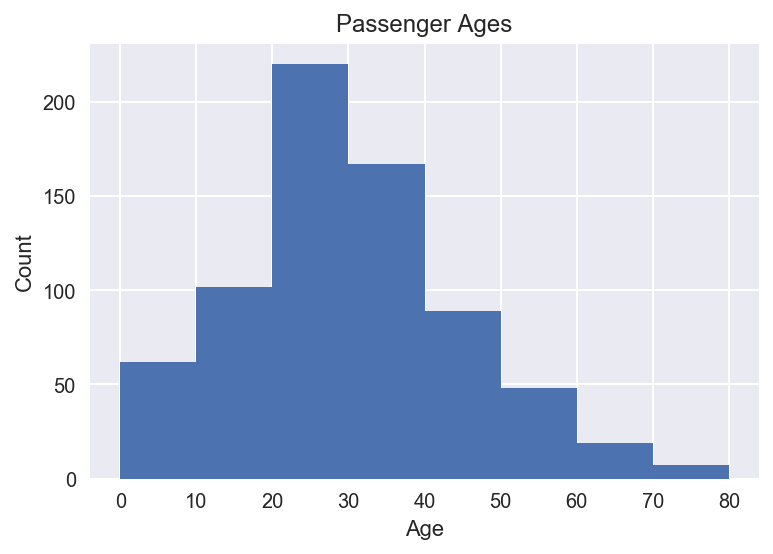

In [67]:
# Create a histogram of ages for initial demographics
ax = titanic_age['Age'].hist(bins = by_ten)

# Label the plot
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Passenger Ages')

In [39]:
# Compute the mean survival in each age group
survival_by_age = titanic_age.groupby(['AgeRange'])['Survived'].agg(['count', 'mean'])
survival_by_age

,count,mean
AgeRange,,
"(0, 10]",64,0.593750
"(10, 20]",115,0.382609
"(20, 30]",230,0.365217
"(30, 40]",155,0.445161
"(40, 50]",86,0.383721
"(50, 60]",42,0.404762
"(60, 70]",17,0.235294
"(70, 80]",5,0.200000


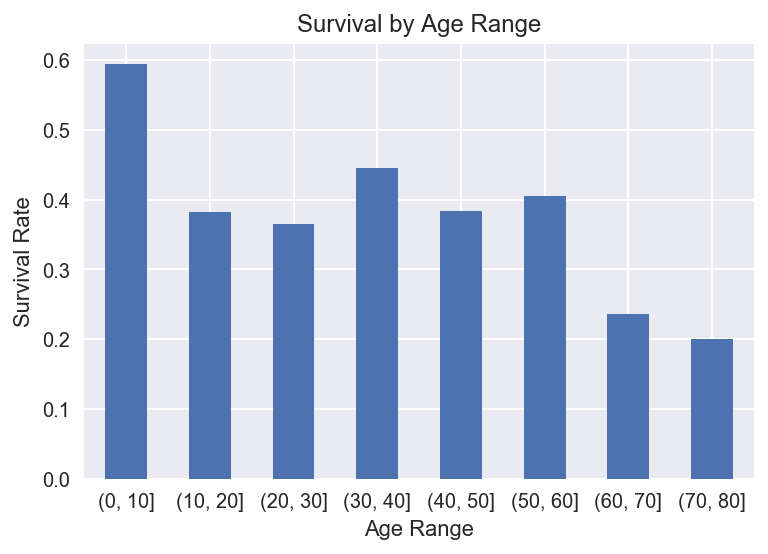

In [61]:
ax = survival_by_age['mean'].plot(kind = 'bar', rot = 0)

ax.set_title('Survival by Age Range')
ax.set_xlabel('Age Range')
ax.set_ylabel('Survival Rate')

## Gender and Class Analysis

In [38]:
titanic_data_full.groupby(['Sex'])['Survived'].agg(['count', 'mean'])

,count,mean
Sex,,
female,314,0.742038
male,577,0.188908


In [37]:
titanic_data_full.groupby(['Pclass'])['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [50]:
# Pclass and Gender comparison chart
class_and_sex = titanic_data_full.groupby(['Pclass', 'Sex'])['Survived']
class_and_sex.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

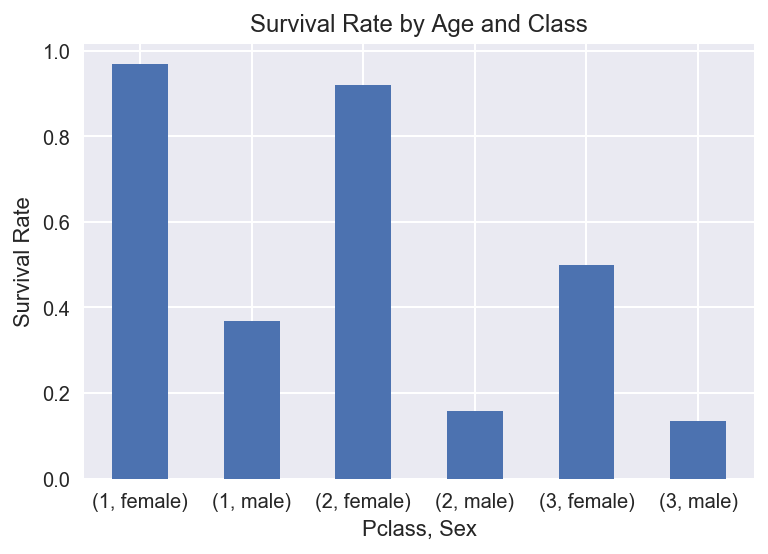

In [62]:
ax = class_and_sex.mean().plot(kind = 'bar', rot = 0)

ax.set_title('Survival Rate by Age and Class')
ax.set_xlabel('Pclass, Sex')
ax.set_ylabel('Survival Rate')

## Fare Analysis

In [65]:
fare_by_class = titanic_data_full.groupby(['Pclass'])['Fare']
fare_by_class.agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


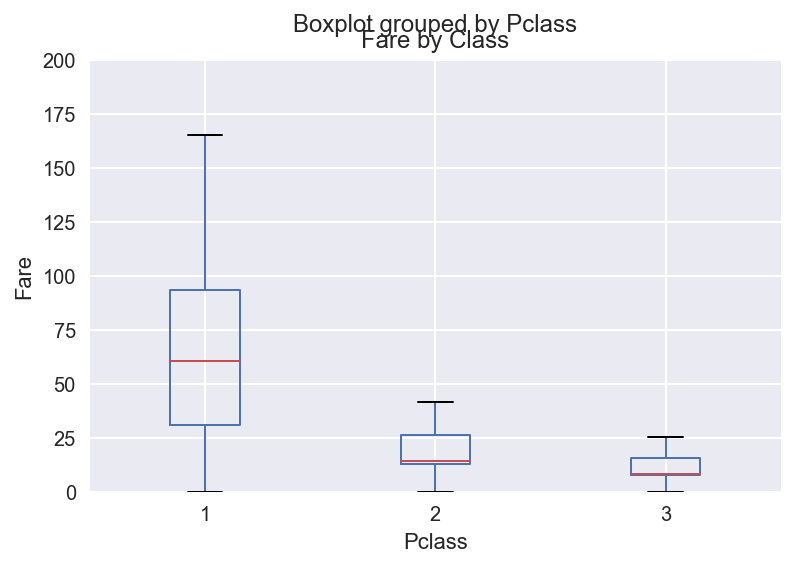

In [64]:
ax = titanic_data_full.boxplot(column = 'Fare', by = 'Pclass')

ax.set_ylim(0, 200)
ax.set_title('Fare by Class')
ax.set_ylabel('Fare')

In [66]:
titanic_data_full.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Conclusions

Conclusions go here

### Sources

https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

Extensive use of the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)